In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(".spyder-py3/Classified Data.txt", index_col = 0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
#Standardize the data, since units maybe different
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [4]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled_features=scaler.transform(df.drop('TARGET CLASS', axis=1))

In [6]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [7]:
#Train model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30)

In [9]:
#Use KNN for K = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [10]:
pred = knn.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
print(confusion_matrix(y_test, pred))

[[154  15]
 [ 13 118]]


In [13]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       169
           1       0.89      0.90      0.89       131

    accuracy                           0.91       300
   macro avg       0.90      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [14]:
##Choosing K value
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

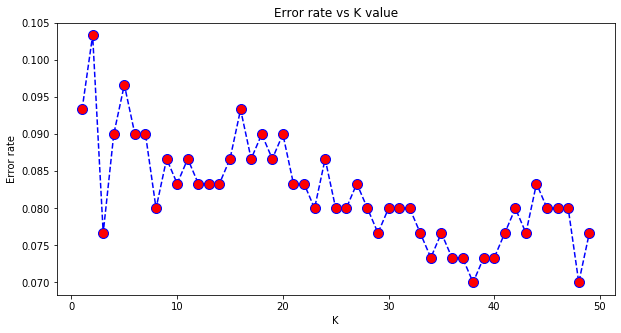

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(range(1,50), error_rate,color='blue', linestyle= 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error rate vs K value")
plt.ylabel('Error rate')
plt.xlabel('K')
plt.show()

In [23]:
#Use KNN for K = 1
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))

[[154  15]
 [  6 125]]


In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       169
           1       0.89      0.95      0.92       131

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

